In [1]:
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
import linearFilters
%matplotlib inline

In [2]:
# Load the training data
with open('train_data.p', 'r') as fp:
    training_set = pickle.load(fp)
# Load the test data
with open('test_data.p', 'r') as fp:
    test_set = pickle.load(fp)
# Load gold standard points
with open('pt_true_bgm.p', 'r') as fp:
    gs_points = pickle.load(fp)

In [3]:
verbose = True
reload(linearFilters)
num_weights = 7
a = linearFilters.mu_LMS_filter(training_set, mu_fraction=0.2, num_weight=num_weights, bias=False, causal=False, delay=1)
pid = training_set.keys()[0]
weight_path, predicted, error = a.train_single_patient(pid, stop_half=True)

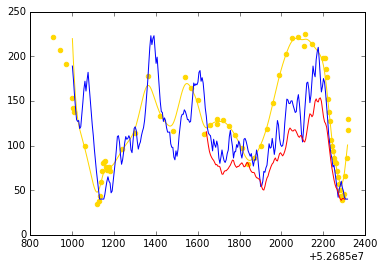

In [6]:
plt.scatter(gs_points[pid][:,0], gs_points[pid][:,1], color='gold') #true gs points
plt.plot(training_set[pid][:,0],training_set[pid][:,2], color='gold', label='Gold Standard') # interpolated gs signal
plt.plot(training_set[pid][:,0],training_set[pid][:,1], color='blue', label='Original CGM') #cgm signal
plt.plot(training_set[pid][:,0], predicted, color='red', label='Filtered CGM') #filtered cgm signal
plt.show()

Starting training..
Done running


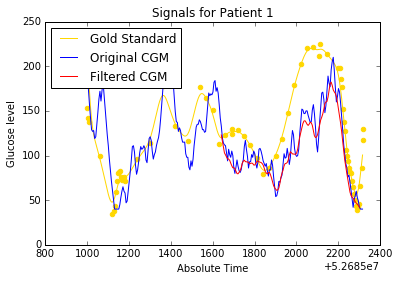

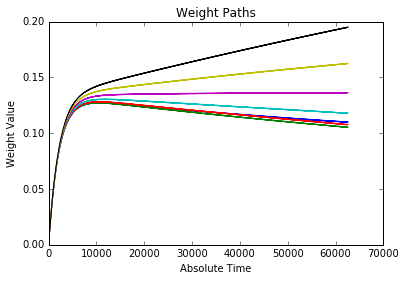

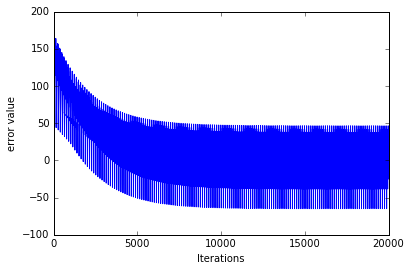

Done running


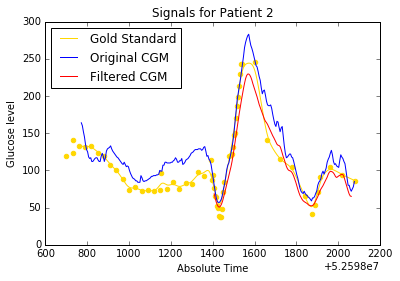

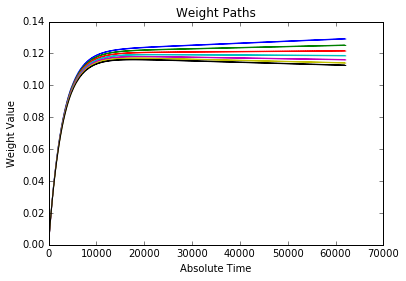

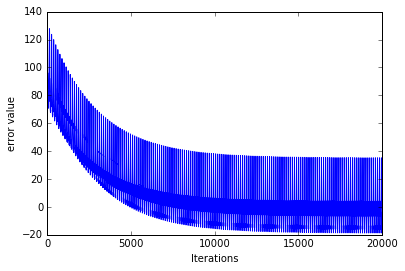

Done running


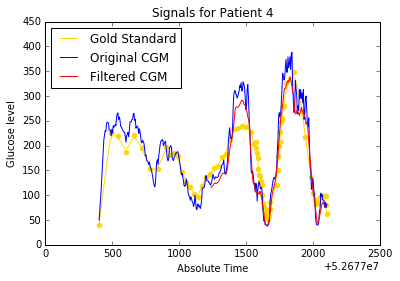

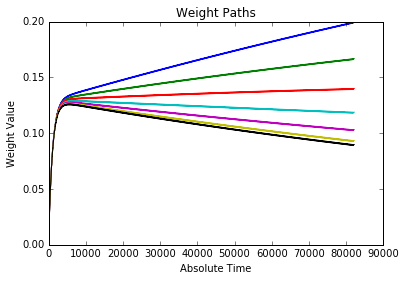

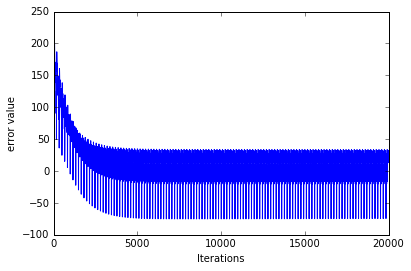

Done running


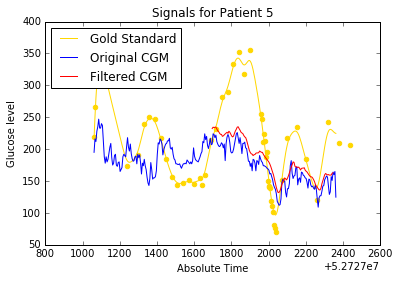

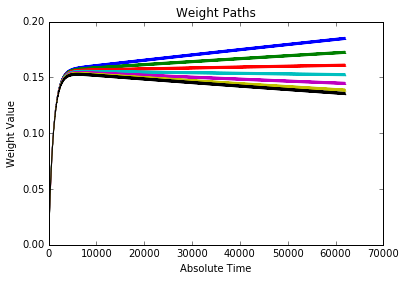

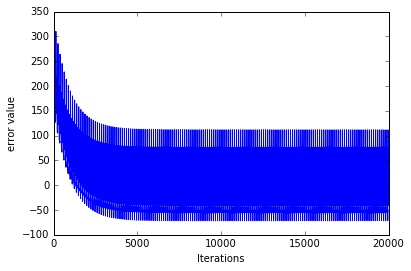

Done running


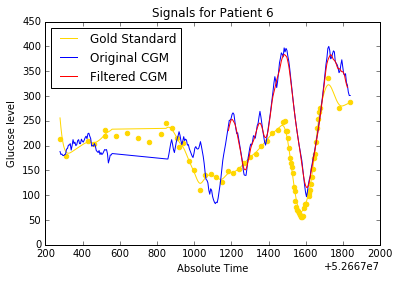

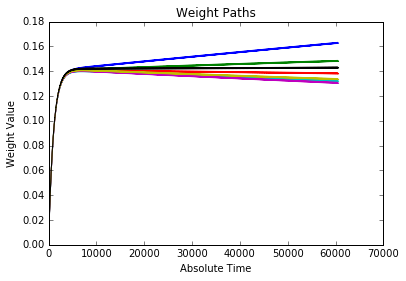

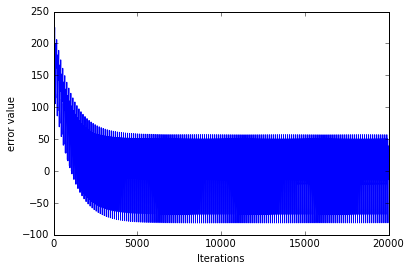

Done running


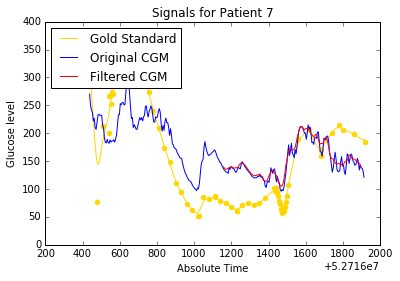

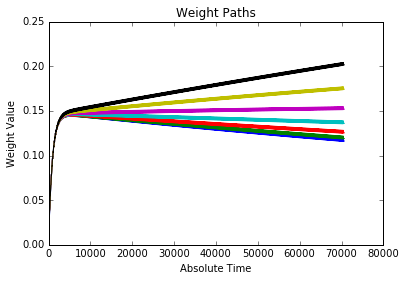

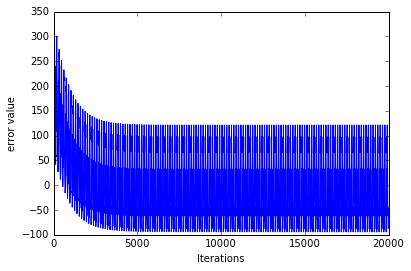

Done running


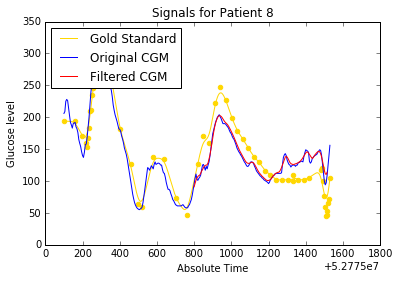

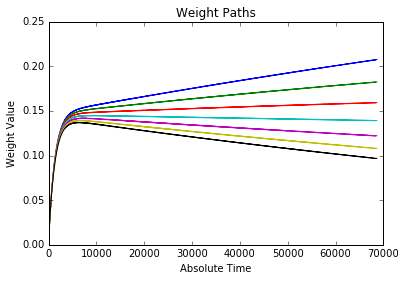

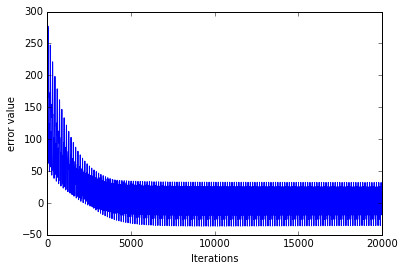

Done running


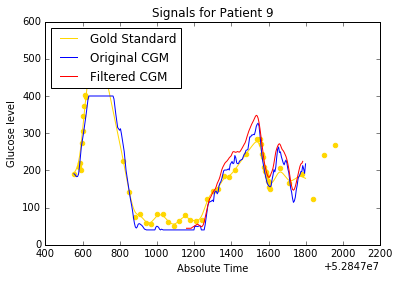

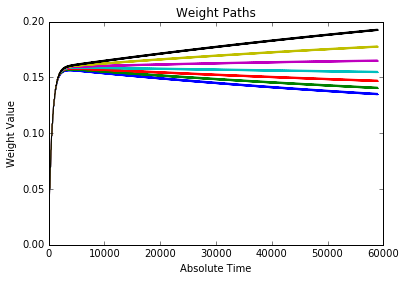

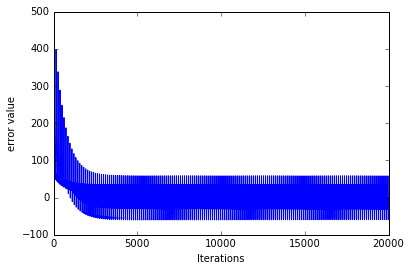

Done running


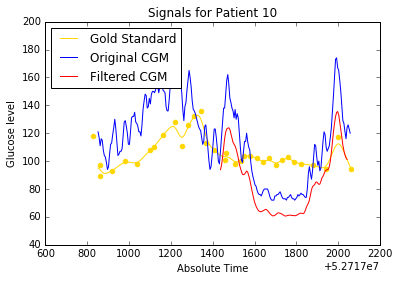

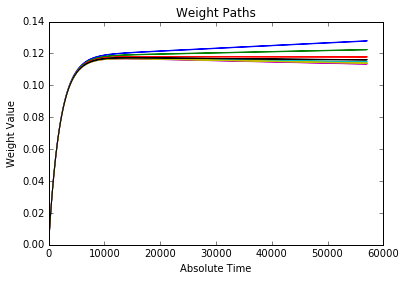

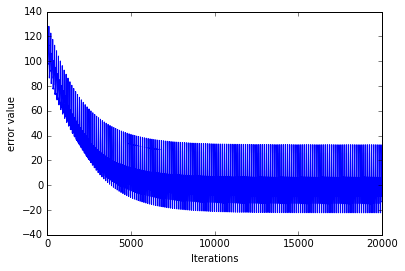

Done running


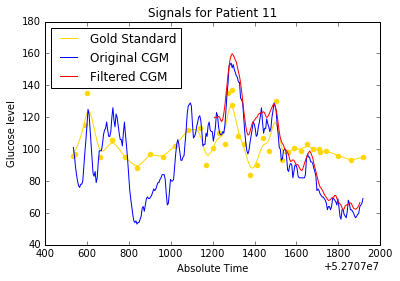

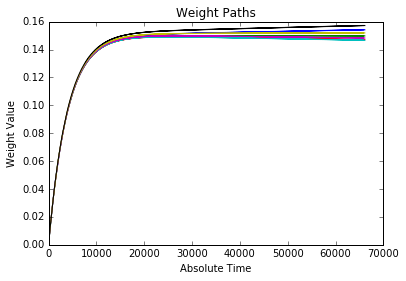

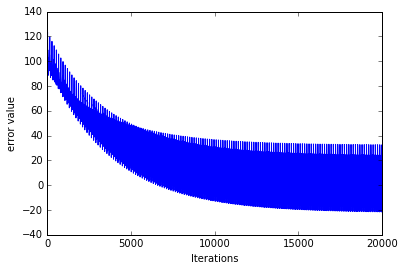

In [25]:
# Test the mu LMS filter patient by patient
verbose = True
reload(linearFilters)
num_weights = 7
a = linearFilters.mu_LMS_filter(training_set, mu_fraction=0.0005, num_weight=num_weights, bias=False, causal=False, delay=1)
print 'Starting training..'
for pid in training_set.keys()[0:10]:
    a.reset_weight()
    weight_path, predicted, error = a.train_single_patient(pid, stop_half=True, train_cycles=500)
    print 'Done running'
    if verbose:
        plt.scatter(gs_points[pid][:,0], gs_points[pid][:,1], color='gold') #true gs points
        plt.plot(training_set[pid][:,0],training_set[pid][:,2], color='gold', label='Gold Standard') # interpolated gs signal
        plt.plot(training_set[pid][:,0],training_set[pid][:,1], color='blue', label='Original CGM') #cgm signal
        plt.plot(training_set[pid][:,0], predicted, color='red', label='Filtered CGM') #filtered cgm signal
        plt.title('Signals for Patient ' + str(pid))
        plt.xlabel('Absolute Time')
        plt.ylabel('Glucose level')
        plt.legend(loc='upper left')
        plt.show()
        
        weight_path = np.transpose(np.reshape(np.concatenate(weight_path), (len(weight_path),num_weights)))
        for row in range(weight_path.shape[0]):
            plt.plot(weight_path[row, :])
            plt.title('Weight Paths')
            plt.xlabel('Absolute Time')
            plt.ylabel('Weight Value')
        plt.show()
        
        plt.plot(error[0:20000])
        plt.xlabel('Iterations')
        plt.ylabel('error value')
        plt.show()
    

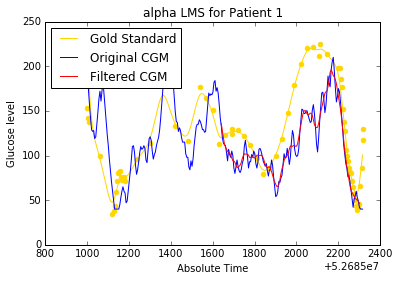

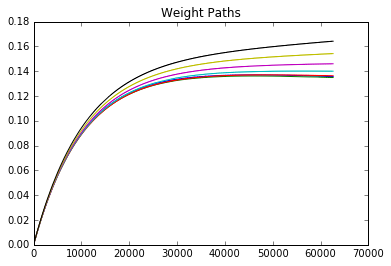

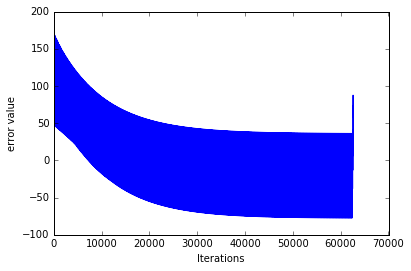

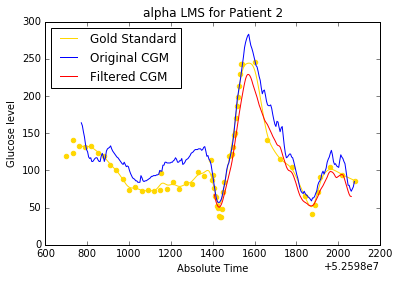

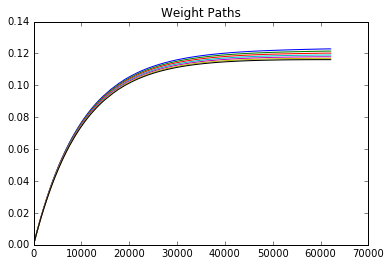

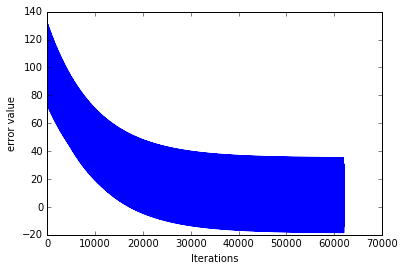

In [29]:
# Test the alpha LMS filter patient by patient
verbose = True
reload(linearFilters)
num_weights = 7
a = linearFilters.alpha_LMS_filter(training_set, alpha=0.0001, num_weight=num_weights, bias=False, causal=False, delay=1)
for pid in training_set.keys()[0:2]:
    a.reset_weight()
    weight_path, predicted, error = a.train_single_patient(pid, stop_half=True, train_cycles=500)
    if verbose:
        plt.scatter(gs_points[pid][:,0], gs_points[pid][:,1], color='gold') #true gs points
        plt.plot(training_set[pid][:,0],training_set[pid][:,2], color='gold', label='Gold Standard') # interpolated gs signal
        plt.plot(training_set[pid][:,0],training_set[pid][:,1], color='blue', label='Original CGM') #cgm signal
        plt.plot(training_set[pid][:,0], predicted, color='red', label='Filtered CGM') #filtered cgm signal
        plt.title('alpha LMS for Patient ' + str(pid))
        plt.xlabel('Absolute Time')
        plt.ylabel('Glucose level')
        plt.legend(loc='upper left')
        plt.show()
        
        weight_path = np.transpose(np.reshape(np.concatenate(weight_path), (len(weight_path),num_weights)))
        for row in range(weight_path.shape[0]):
            plt.plot(weight_path[row, :])
            plt.title('Weight Paths')
        plt.show()
        
        plt.plot(error)
        plt.xlabel('Iterations')
        plt.ylabel('error value')
        plt.show()
    

In [ ]:
# Test the LMS_filter by training on multiple patients

verbose = True
reload(linearFilters)
a = linearFilters.mu_LMS_filter(training_set, mu_fraction=0.2, num_weight=7, bias=True, causal=False, delay=1)
a.train(num_repeat=10)
b = linearFilters.alpha_LMS_filter(training_set, alpha=0.02, num_weight=3, bias=False, causal=False, delay=1)
b.train(num_repeat=10)

for idx in test_set.keys()[10:11]:
    print idx
    data = test_set[idx]
    timepoints = data[:,0]
    cgm = data[:,1]
    bgm = data[:,2]
    filtered_cgm = b.apply_filter(cgm)
    filtered_cgm2 = a.apply_filter(cgm)
    
    if verbose:
        # plot results
        plt.scatter(gs_points[idx][:,0], gs_points[idx][:,1], color='yellow') #true gs points
        plt.plot(timepoints,bgm, color='yellow') # interpolated gs signal
        plt.plot(timepoints,cgm, color='blue') #cgm signal
        plt.plot(timepoints, filtered_cgm, color='red') #filtered cgm signal
        plt.show()